In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv('Cleared_Quickr.csv')
df.head()

,Unnamed: 0,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
0,0,3,3,2036.0,245.0,193
1,1,2,2,1094.0,175.0,13
2,2,2,2,1070.0,75.0,225
3,3,2,2,950.0,90.0,332
4,4,2,2,1070.0,75.0,332


In [56]:
df.describe()

,Unnamed: 0,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
count,22700.000000,22700.000000,22700.000000,22700.000000,22700.000000,22700.000000
mean,11450.918326,2.786564,2.530352,1793.592863,193.475274,973.508811
std,6614.356224,0.740444,0.934671,997.938746,232.375831,1227.557302
min,0.000000,1.000000,1.000000,306.000000,10.500000,1.000000
25%,5714.750000,2.000000,2.000000,1200.000000,88.000000,82.000000
50%,11463.500000,3.000000,3.000000,1523.000000,135.000000,287.000000
75%,17189.250000,3.000000,3.000000,1980.000000,220.000000,2274.000000
max,22890.000000,4.000000,6.000000,14000.000000,13500.000000,3435.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22700 entries, 0 to 22699
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           22700 non-null  int64  
 1   No. of Bedrooms      22700 non-null  int64  
 2   No. of Bathrooms     22700 non-null  int64  
 3   Total Area (Sq.Ft.)  22700 non-null  float64
 4   Price (Lakhs)        22700 non-null  float64
 5   Location_Encoded     22700 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.0 MB


In [58]:
df.isnull().sum()

Unnamed: 0             0
No. of Bedrooms        0
No. of Bathrooms       0
Total Area (Sq.Ft.)    0
Price (Lakhs)          0
Location_Encoded       0
dtype: int64

In [59]:
X = df.drop(columns=["Price (Lakhs)"])
y = df["Price (Lakhs)"]


In [60]:
from sklearn.preprocessing import StandardScaler

#Standardize the features (Pca affected by scale)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
from sklearn.decomposition import PCA

# Apply PCA (keeping % variance)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


#Check no.of principal components

print(f'Number of Principle Components : {X_pca.shape[1]}')

Number of Principle Components : 4


In [79]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state = 42 )


#Train support vector regression model

svr_model = SVR(kernel ='rbf', C=100, gamma='scale', epsilon=0.1)
#svr_model = SVR(kernel ='linear', C=100, gamma='scale', epsilon=0.1)
#svr_model = SVR(kernel ='rbf', C=10, gamma=0.1, epsilon=0.2)
svr_model.fit(X_train, y_train)

# Predict on test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate model performance
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR")
print("Mean Absolute Error:", mae_svr)
print("Root Mean Squared Error: ", rmse_svr)
print("R2 Score:", r2_svr)

SVR
Mean Absolute Error: 52.946919944157464
Root Mean Squared Error:  237.04232154030825
R2 Score: 0.30781872572871605


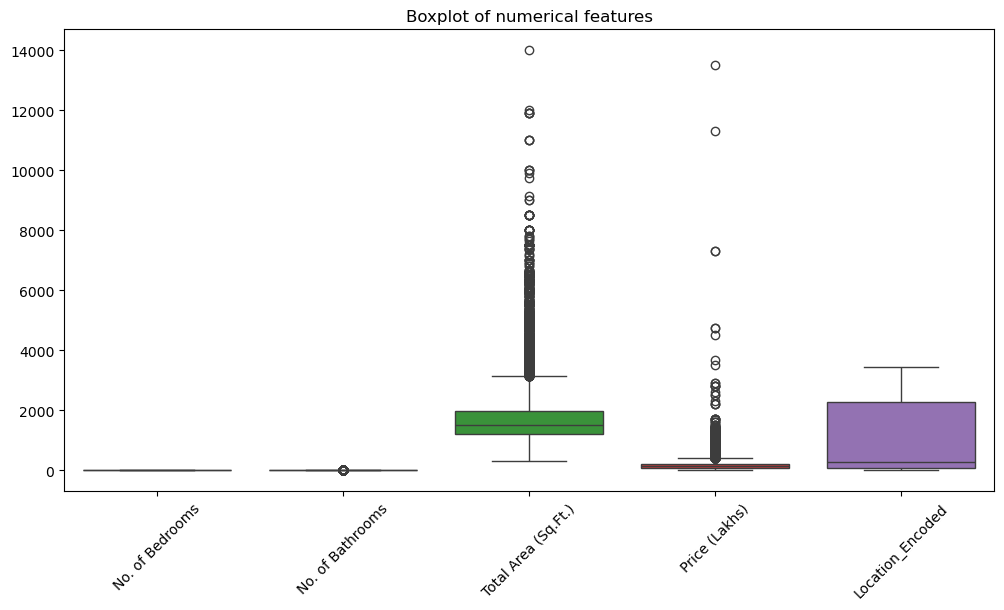

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["No. of Bedrooms", 'No. of Bathrooms', 'Total Area (Sq.Ft.)', 'Price (Lakhs)', 'Location_Encoded']])
plt.xticks(rotation=45)
plt.title("Boxplot of numerical features")
plt.show()


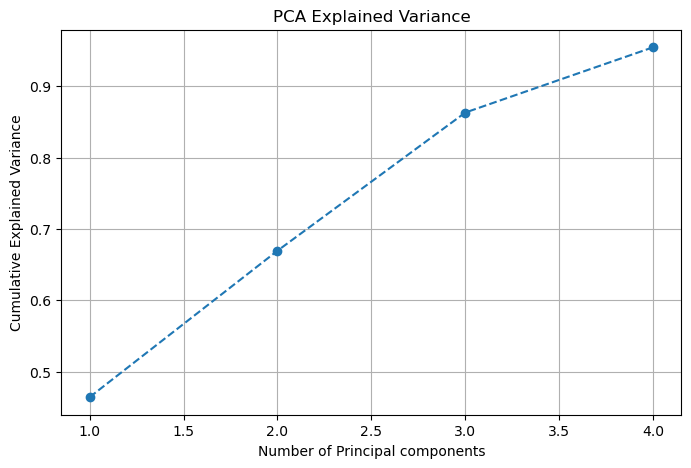

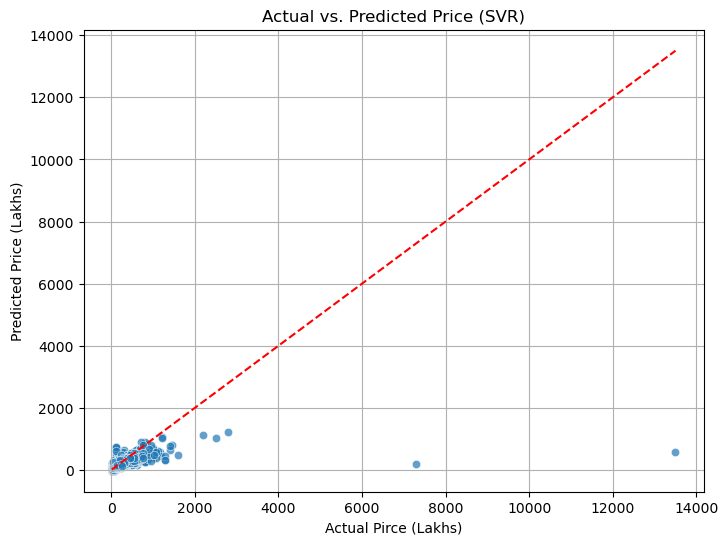

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
#PCA Explained Variance plot

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

# Actual vs. Predicated Price Plot(SVR)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y = y_pred_svr, alpha=0.7)
plt.xlabel("Actual Pirce (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs. Predicted Price (SVR)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.grid()
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


# Train Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [66]:
#Predict on test set

y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error : ", mae)
print("Root Mean Squared Error : ",rmse)
print("R2 Score : ", r2)


Mean Absolute Error :  62.387790813097
Root Mean Squared Error :  237.68435173880644
R2 Score :  0.3040640956739331


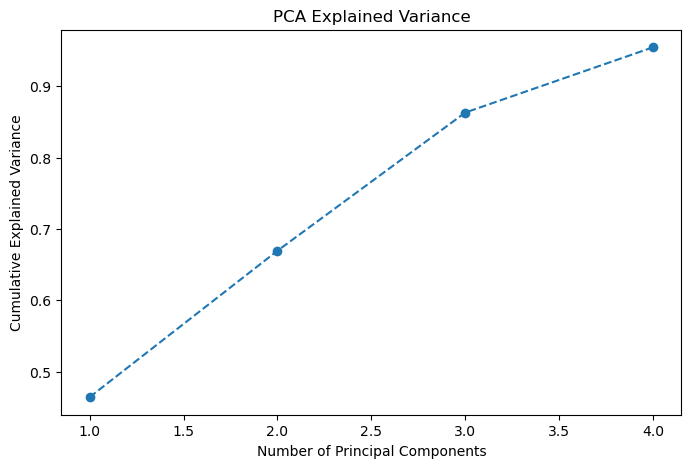

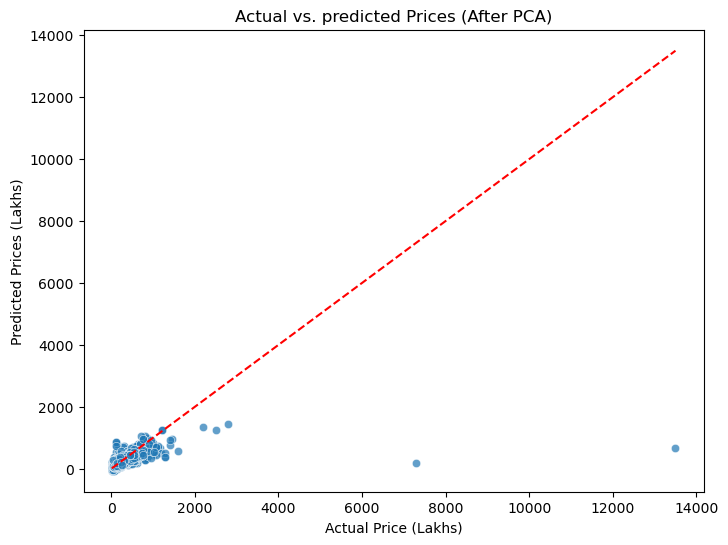

In [68]:

import matplotlib.pyplot as plt
import seaborn as sns

# Explained Variance Plot(PCA)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel('Cumulative Explained Variance')
plt.title("PCA Explained Variance")
plt.show()


# Plot Actual vs. Predicted Price

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Prices (Lakhs)")
plt.title("Actual vs. predicted Prices (After PCA)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red') 
plt.show()

